### Librerias y carga de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from sklearn.model_selection import train_test_split
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("..\\data\\processed\\train_sentiment_2.csv", index_col=0)
train_clustering = train.drop(columns="forks")

test = pd.read_csv("..\\data\\processed\\test_sentiment_2.csv", index_col=0)
test_clustering = test.drop(columns="forks")

## KMeans-MiniBatch

In [15]:
kmeans_per_k = [MiniBatchKMeans(n_clusters=k, random_state=42).fit(train_clustering)
                for k in range(2, 21)]
inertias = [model.inertia_ for model in kmeans_per_k]

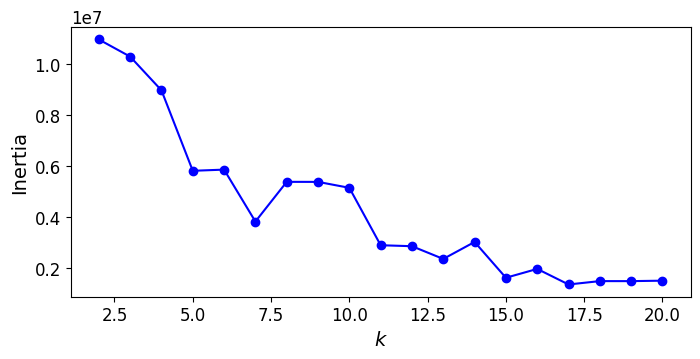

In [37]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(2, 21), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)


plt.show()

In [14]:
silhouette_scores = [silhouette_score(train_clustering, model.labels_)
                     for model in kmeans_per_k[2:12]]

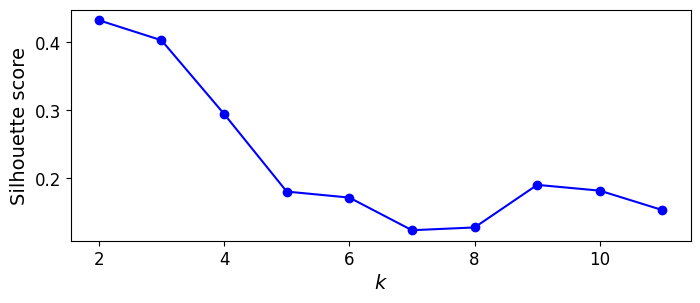

In [49]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 12), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

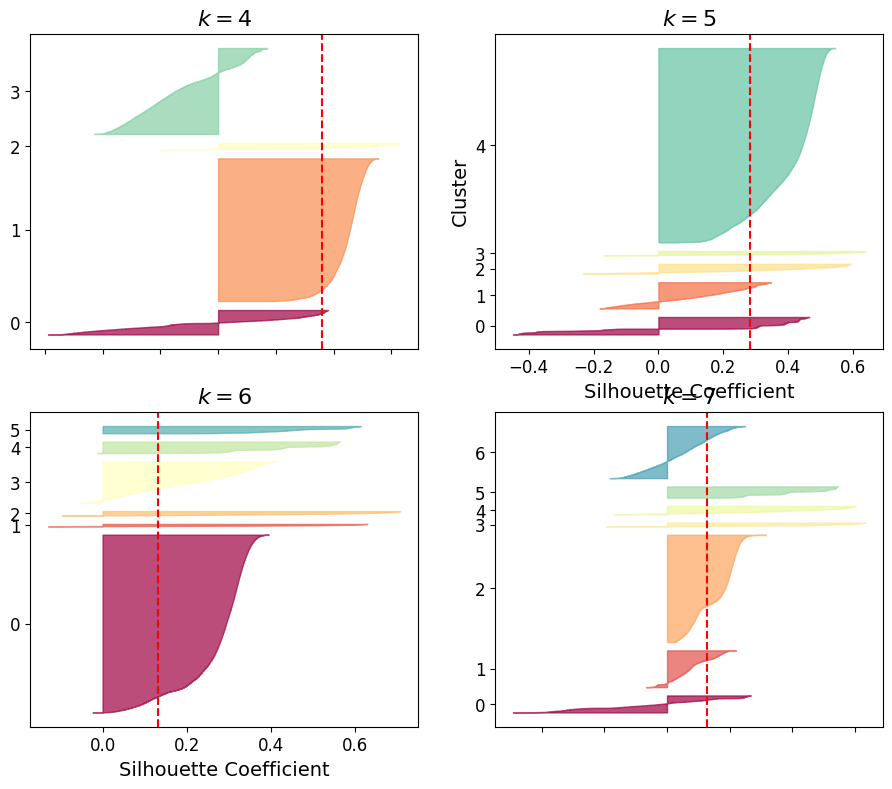

In [15]:

plt.figure(figsize=(11, 9))

for k in (4,5,6,7):
    plt.subplot(2, 2, k - 3)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(train_clustering, y_pred)

    padding = len(train_clustering) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()


In [4]:
kmeans = MiniBatchKMeans(5, random_state=42).fit(train_clustering)

<Axes: ylabel='count'>

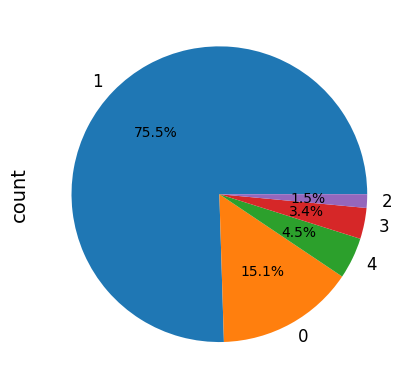

In [5]:
df_cluster = pd.DataFrame(kmeans.labels_, columns=["Cluster"])
df_cluster['Cluster'].value_counts().plot.pie(autopct="%.1f%%")

Select form model a los que mejor les haya ido para decidir

In [5]:
train_cluster = kmeans.predict(train_clustering)
print(train_clustering.shape)
print(train_cluster.size)

(134949, 11)
134949


In [6]:
train_clustering["forks"] = train["forks"]

In [7]:
train_clustering["cluster_result"] = train_cluster

In [8]:
test_cluster = kmeans.predict(test_clustering)
test_clustering["forks"] = test["forks"]
test_clustering["cluster_result"] = test_cluster

In [9]:
train_cluster_0 = train_clustering[train_clustering["cluster_result"] == 0]
test_cluster_0 = test_clustering[test_clustering["cluster_result"] == 0]

In [10]:
train_cluster_1 = train_clustering[train_clustering["cluster_result"] == 1]
test_cluster_1 = test_clustering[test_clustering["cluster_result"] == 1]

In [11]:
train_cluster_2 = train_clustering[train_clustering["cluster_result"] == 2]
test_cluster_2 = test_clustering[test_clustering["cluster_result"] == 2]

In [12]:
train_cluster_3 = train_clustering[train_clustering["cluster_result"] == 3]
test_cluster_3 = test_clustering[test_clustering["cluster_result"] == 3]

In [13]:
train_cluster_4 = train_clustering[train_clustering["cluster_result"] == 4]
test_cluster_4 = test_clustering[test_clustering["cluster_result"] == 4]

In [14]:
train_cluster_0.to_csv("..\\data\\processed\\train_cluster_0.csv")
test_cluster_0.to_csv("..\\data\\processed\\test_cluster_0.csv")
train_cluster_1.to_csv("..\\data\\processed\\train_cluster_1.csv")
test_cluster_1.to_csv("..\\data\\processed\\test_cluster_1.csv")
train_cluster_2.to_csv("..\\data\\processed\\train_cluster_2.csv")
test_cluster_2.to_csv("..\\data\\processed\\test_cluster_2.csv")
train_cluster_3.to_csv("..\\data\\processed\\train_cluster_3.csv")
test_cluster_3.to_csv("..\\data\\processed\\test_cluster_3.csv")
train_cluster_4.to_csv("..\\data\\processed\\train_cluster_4.csv")
test_cluster_4.to_csv("..\\data\\processed\\test_cluster_4.csv")